<a href="https://colab.research.google.com/github/984IKRAM/24010307-EL-BOUKHARI-IKRAM-CAC-2-/blob/main/Python_Learning_%26_Exam_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURS DATA SCIENCE : Python Learning & Exam Performance Dataset


# 1. IMPORTATION DES BIBLIOTHÈQUES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration pour des graphiques plus esthétiques
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Pour garder la sortie propre

print("1. Bibliothèques importées avec succès.\n")

1. Bibliothèques importées avec succès.



In [ ]:
df=pd.read_csv('/content/python_learning_exam_performance.csv')
df



,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,39,Brazil,NaN,1,9.3,60,2,41,1,1,4,4,27.9,0
2996,2997,34,Indonesia,Intermediate,6,5.8,63,2,35,0,0,3,3,41.9,0
2997,2998,52,Pakistan,Beginner,3,1.4,63,2,45,1,1,7,7,26.9,0
2998,2999,54,Pakistan,Intermediate,5,8.5,51,2,35,1,0,4,2,27.8,0


In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Classes : {data.target_names} (0 = Malin, 1 = Bénin)\n")

2. Données chargées. Taille du dataset : (569, 31)
   Classes : ['malignant' 'benign'] (0 = Malin, 1 = Bénin)



# 3. SIMULATION DE DONNES

In [ ]:
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42) # Pour la reproductibilité
mask = np.random.random(df.shape) < 0.05 # Masque de 5%

# On applique les NaN partout sauf sur la colonne 'target' (qu'on ne veut pas abîmer ici)
features_columns = df.columns[:-1]
df_dirty = df.copy()
for col in features_columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 840



# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)

In [ ]:
print("4. Nettoyage des données...")

# Séparation Features (X) et Target (y) AVANT le nettoyage pour éviter les fuites de données
X = df_dirty.drop('target', axis=1)
y = df_dirty['target']

# Imputation : Remplacer les NaN par la MOYENNE de la colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# On remet sous forme de DataFrame pour garder les noms de colonnes (plus propre)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")


4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0



# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premières 5 colonnes) :
       mean radius  mean texture  mean perimeter    mean area  mean smoothness
count   569.000000    569.000000      569.000000   569.000000       569.000000
mean     14.130115     19.253253       91.927505   653.044917         0.096353
std       3.457717      4.198742       23.698676   342.556617         0.013394
min       6.981000      9.710000       47.920000   143.500000         0.052630
25%      11.740000     16.330000       75.490000   426.000000         0.086840
50%      13.560000     19.070000       87.460000   566.200000         0.096353
75%      15.710000     21.590000      102.700000   748.900000         0.104800
max      28.110000     39.280000      188.500000  2501.000000         0.144700


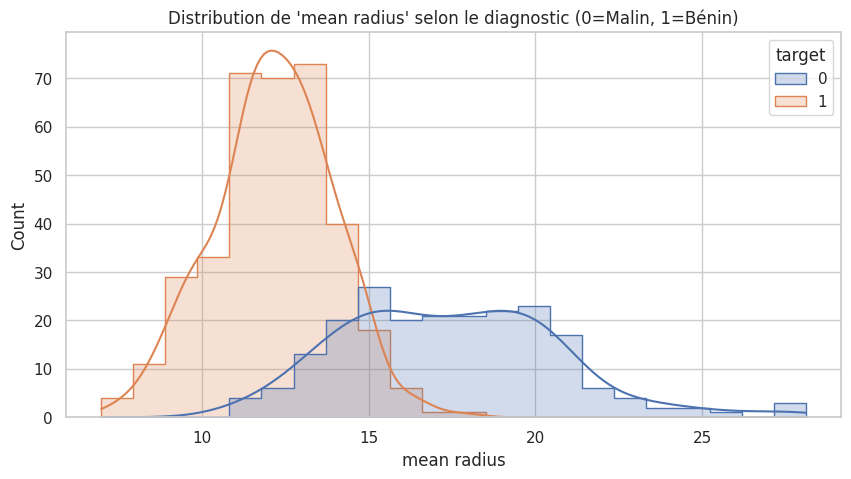

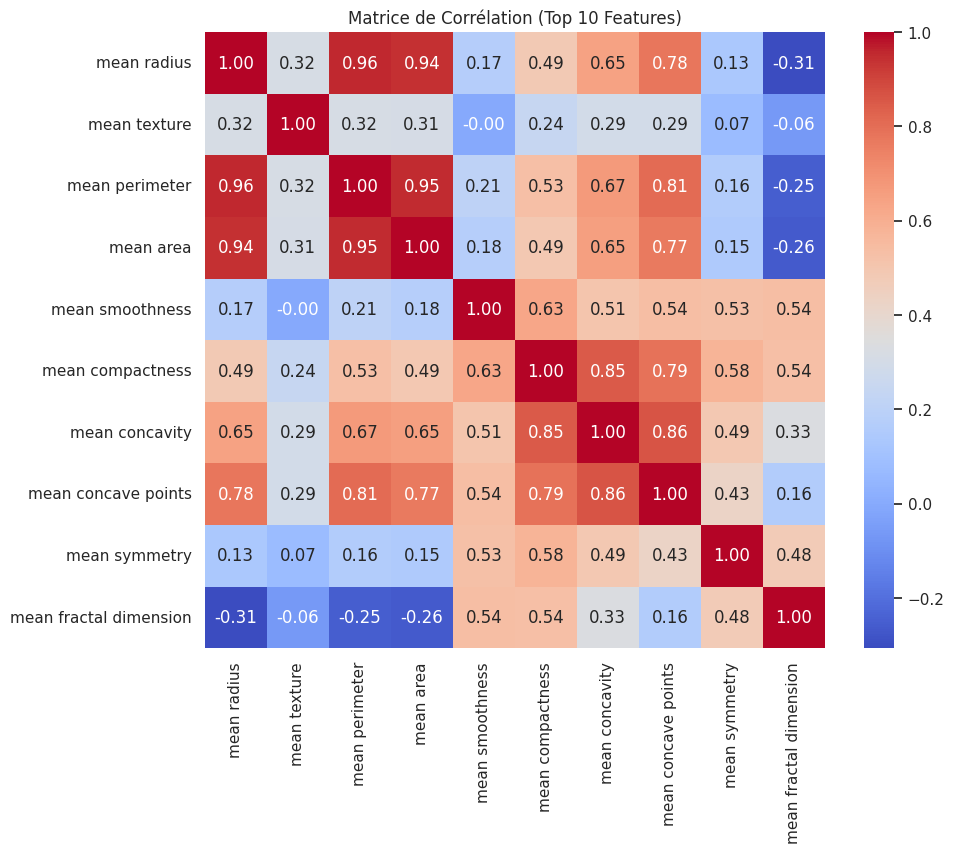

In [ ]:
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique
print("   Statistiques descriptives (premières 5 colonnes) :")
print(X_clean.iloc[:, :5].describe())

# B. Visualisation 1 : Distribution d'une feature clé
plt.figure(figsize=(10, 5))
feature_to_plot = 'mean radius'
sns.histplot(data=df, x=feature_to_plot, hue='target', kde=True, element="step")
plt.title(f"Distribution de '{feature_to_plot}' selon le diagnostic (0=Malin, 1=Bénin)")
plt.show()

# C. Visualisation 2 : Heatmap de corrélation (sur les 10 premières variables pour la lisibilité)
plt.figure(figsize=(10, 8))
correlation_matrix = X_clean.iloc[:, :10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Top 10 Features)")
plt.show()

# 6. SÉPARATION DES DONNÉES (Train / Test Split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

print(f"\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")


6. Séparation effectuée :
   Entraînement : 455 échantillons
   Test : 114 échantillons



# 7. MODÉLISATION (Machine Learning)

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Accuracy Score : 95.61%

   >>> Rapport de Classification :
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



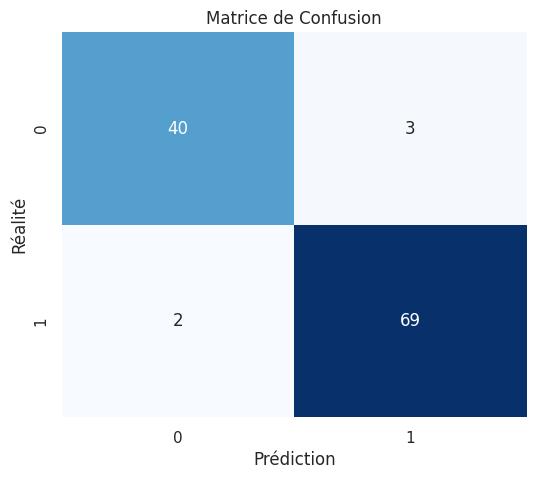


--- FIN DU SCRIPT ---


In [ ]:
print("7. Entraînement du modèle (Random Forest Classifier)...")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialisation du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement sur les données d'entraînement uniquement
model.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

# Prédictions sur le jeu de test (données jamais vues par le modèle)
y_pred = model.predict(X_test)

# A. Accuracy (Précision globale)
acc = accuracy_score(y_test, y_pred)
print(f"   >>> Accuracy Score : {acc*100:.2f}%")

# B. Rapport détaillé
print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred))

# C. Matrice de Confusion Visuelle
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

print("\n--- FIN DU SCRIPT ---")


## Modèle de Régression Random Forest pour la Prédiction du Score Final à l'Examen (Version Adaptée)

1. Bibliothèques importées.
2. Chargement et préparation des données...
   Données préparées. Forme de X: (3000, 21), Forme de y: (3000,)
3. Séparation des données en ensembles d'entraînement et de test...
   Taille de l'ensemble d'entraînement: 2100 échantillons
   Taille de l'ensemble de test: 900 échantillons

4. Entraînement du modèle Random Forest Regressor...
   Modèle Random Forest Regressor entraîné avec succès.

5. Évaluation des performances du modèle...
   R2 Score (Random Forest): 0.5969
   Mean Absolute Error (MAE - Random Forest): 8.8267
   Root Mean Squared Error (RMSE - Random Forest): 11.0570

6. Génération des visualisations...


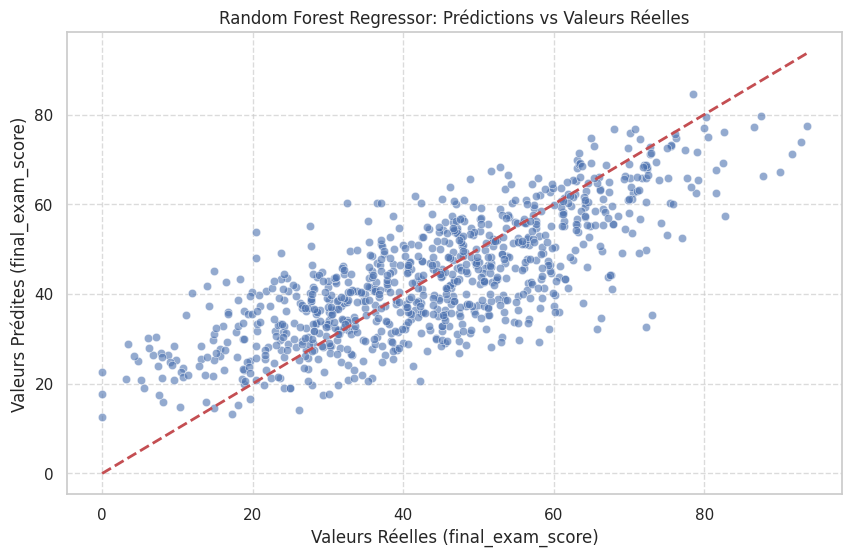

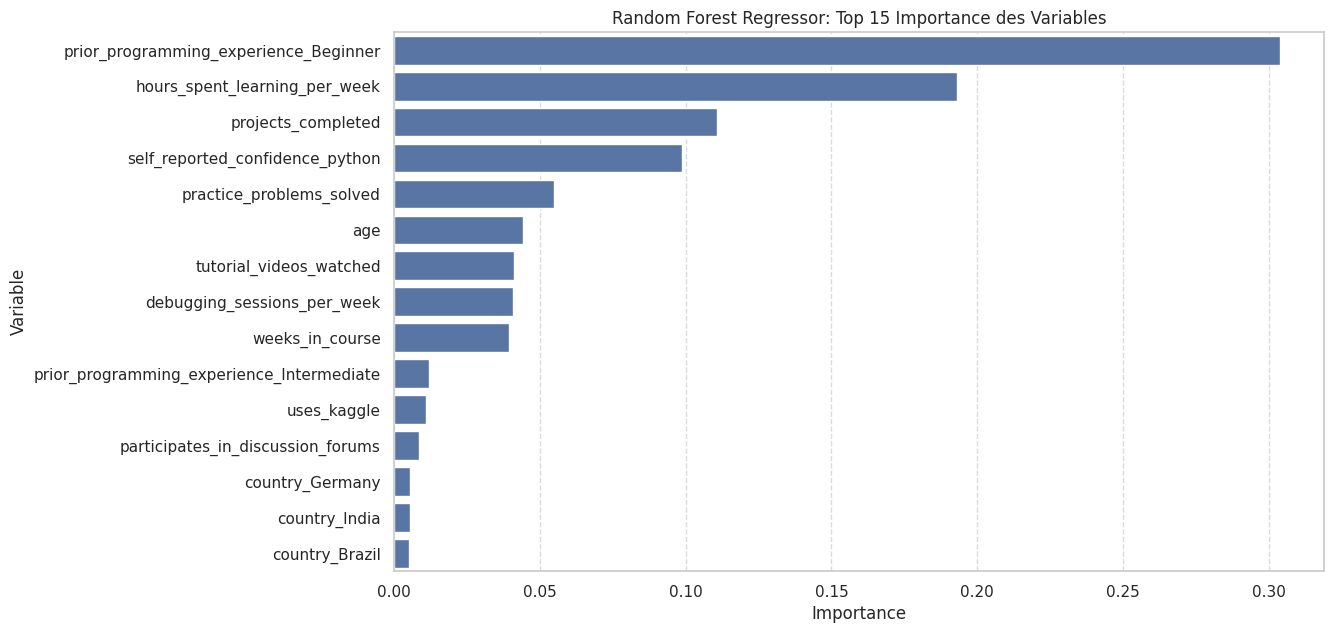

Opération de régression Random Forest terminée.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor # Import the Random Forest Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("1. Bibliothèques importées.")

# 🔹 1. Chargement et Préparation des données
print("2. Chargement et préparation des données...")
original_df = pd.read_csv('/content/python_learning_exam_performance.csv')

# Gérer les valeurs manquantes pour la colonne catégorielle 'prior_programming_experience'
imputer_cat = SimpleImputer(strategy='most_frequent')
original_df['prior_programming_experience'] = imputer_cat.fit_transform(original_df[['prior_programming_experience']]).ravel()

# One-hot encode les variables catégorielles
df_processed = pd.get_dummies(original_df, columns=['country', 'prior_programming_experience'], drop_first=True)

# Définition des variables X et y
# y = 'final_exam_score' (variable cible pour la régression)
# X = toutes les autres variables pertinentes (exclure 'passed_exam' et 'student_id')
y = df_processed['final_exam_score']
X = df_processed.drop(columns=['final_exam_score', 'passed_exam', 'student_id'])

print(f"   Données préparées. Forme de X: {X.shape}, Forme de y: {y.shape}")

# 🔹 2. Séparation des données (Training et Test sets)
print("3. Séparation des données en ensembles d'entraînement et de test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"   Taille de l'ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"   Taille de l'ensemble de test: {X_test.shape[0]} échantillons\n")

# 🔹 3. Entraînement du Modèle Random Forest Regressor
print("4. Entraînement du modèle Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=200, random_state=42) # Using 200 estimators as per previous snippet
rf_model.fit(X_train, y_train)
print("   Modèle Random Forest Regressor entraîné avec succès.\n")

# 🔹 4. Évaluation du Modèle
print("5. Évaluation des performances du modèle...")
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf)) # Corrected RMSE calculation

print(f"   R2 Score (Random Forest): {r2_rf:.4f}")
print(f"   Mean Absolute Error (MAE - Random Forest): {mae_rf:.4f}")
print(f"   Root Mean Squared Error (RMSE - Random Forest): {rmse_rf:.4f}\n")

# 🔹 5. Visualisation des Résultats
print("6. Génération des visualisations...")

# Graphique 1: Prédictions vs Valeurs Réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Ligne idéale
plt.title('Random Forest Regressor: Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles (final_exam_score)')
plt.ylabel('Valeurs Prédites (final_exam_score)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Graphique 2: Importance des Features
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(15)) # Top 15 features
plt.title('Random Forest Regressor: Top 15 Importance des Variables')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Opération de régression Random Forest terminée.")

## Statistiques Descriptives et Analyse Préliminaire du Dataset (Régénéré)

1. Bibliothèques importées.
Utilisation du df_processed existant.

2. Statistiques descriptives pour les colonnes numériques :


,student_id,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,0.400667,0.498333,4.973333,5.566000,43.318267,0.177333
std,866.169729,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,0.490115,0.500081,2.236729,2.885207,17.376666,0.382014
min,1.000000,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,750.750000,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,0.000000,0.000000,3.000000,3.000000,30.900000,0.000000
50%,1500.500000,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,0.000000,0.000000,5.000000,6.000000,43.100000,0.000000
75%,2250.250000,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,1.000000,1.000000,6.000000,8.000000,55.600000,0.000000
max,3000.000000,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,1.000000,1.000000,17.000000,10.000000,100.000000,1.000000



3. Informations sur le DataFrame (types de données, valeurs non nulles) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   student_id                                 3000 non-null   int64  
 1   age                                        3000 non-null   int64  
 2   weeks_in_course                            3000 non-null   int64  
 3   hours_spent_learning_per_week              3000 non-null   float64
 4   practice_problems_solved                   3000 non-null   int64  
 5   projects_completed                         3000 non-null   int64  
 6   tutorial_videos_watched                    3000 non-null   int64  
 7   uses_kaggle                                3000 non-null   int64  
 8   participates_in_discussion_forums          3000 non-null   int64  
 9   debugging_sessions_pe

None


4. Visualisation des distributions de quelques caractéristiques clés :


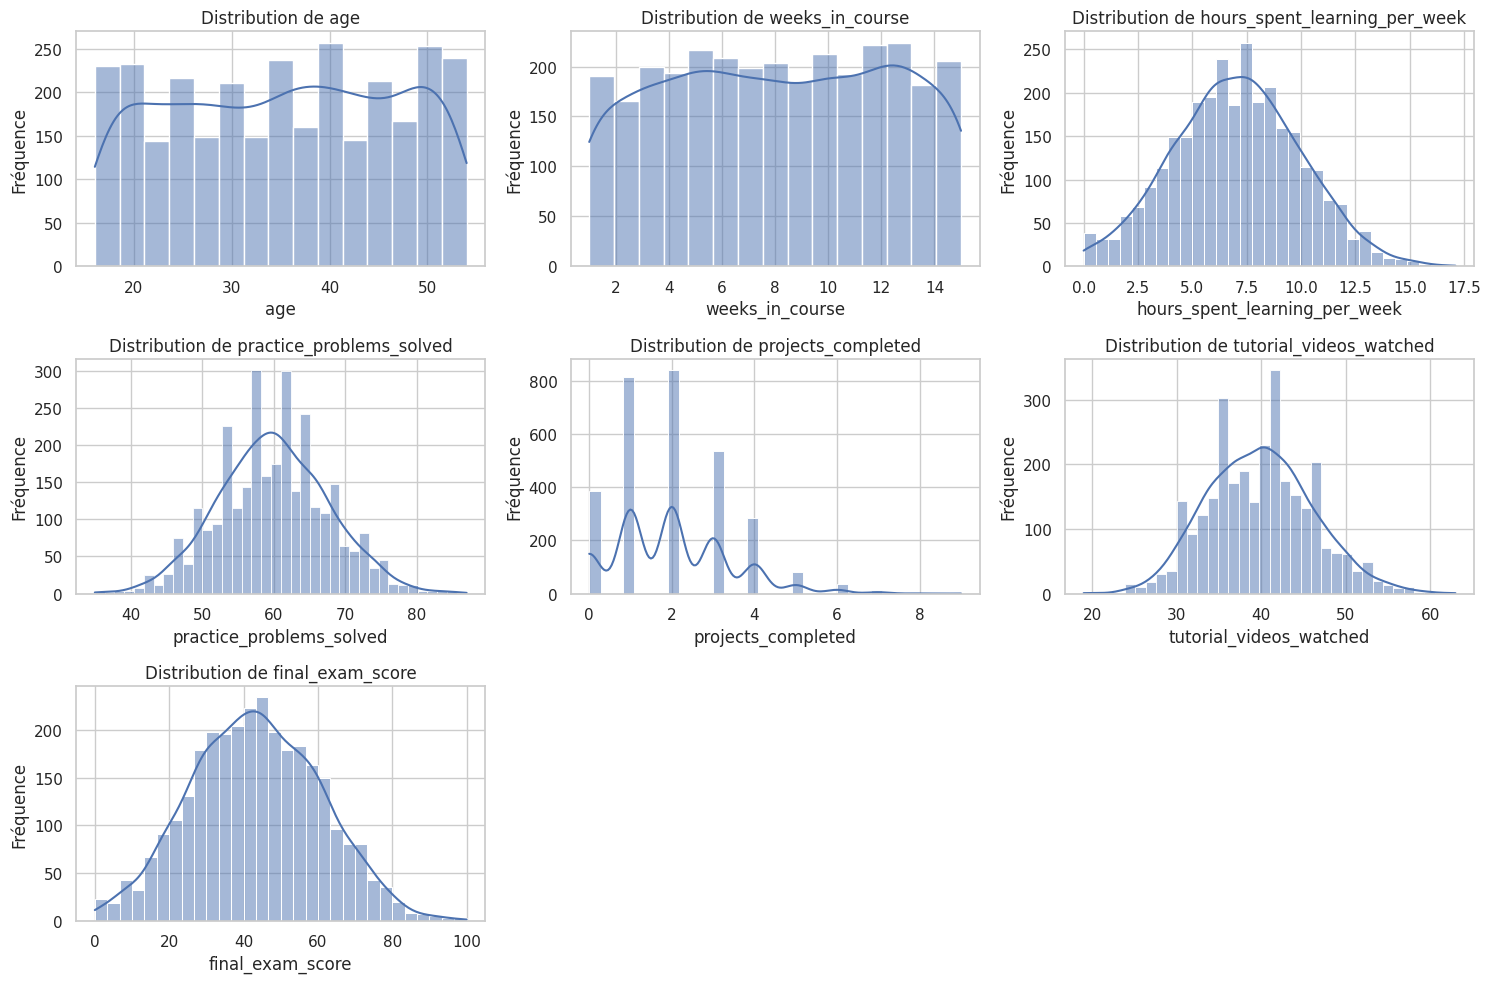


5. Visualisation des fréquences pour une caractéristique catégorielle (prior_programming_experience) :


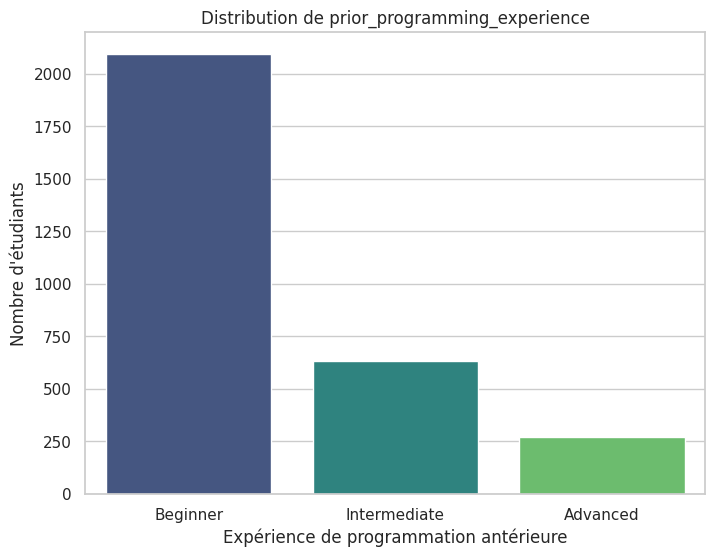

Statistiques descriptives et analyse préliminaire terminées.


In [ ]:
# 📦 Import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("1. Bibliothèques importées.")

# Assurez-vous que df_processed est chargé (recharge si nécessaire pour l'indépendance de la cellule)
# Cela suppose que le fichier CSV est au même emplacement et que les étapes de prétraitement sont appliquées
try:
    df_processed.head()
    print("Utilisation du df_processed existant.")
except NameError:
    print("df_processed non trouvé, rechargement et prétraitement des données...")
    original_df = pd.read_csv('/content/python_learning_exam_performance.csv')
    from sklearn.impute import SimpleImputer
    imputer_cat = SimpleImputer(strategy='most_frequent')
    original_df['prior_programming_experience'] = imputer_cat.fit_transform(original_df[['prior_programming_experience']]).ravel()
    df_processed = pd.get_dummies(original_df, columns=['country', 'prior_programming_experience'], drop_first=True)
    print("df_processed rechargé et prétraité.")


print("\n2. Statistiques descriptives pour les colonnes numériques :")
display(df_processed.describe())

print("\n3. Informations sur le DataFrame (types de données, valeurs non nulles) :")
display(df_processed.info())

print("\n4. Visualisation des distributions de quelques caractéristiques clés :")

# Sélection de quelques caractéristiques numériques pour la visualisation
numerical_features = ['age', 'weeks_in_course', 'hours_spent_learning_per_week',
                      'practice_problems_solved', 'projects_completed',
                      'tutorial_videos_watched', 'final_exam_score']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1) # Créer une grille de sous-graphiques
    sns.histplot(df_processed[feature], kde=True) # Histogramme avec estimation de densité de noyau
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

print("\n5. Visualisation des fréquences pour une caractéristique catégorielle (prior_programming_experience) :")
plt.figure(figsize=(8, 6))
sns.countplot(data=original_df, x='prior_programming_experience', palette='viridis')
plt.title('Distribution de prior_programming_experience')
plt.xlabel('Expérience de programmation antérieure')
plt.ylabel('Nombre d\'étudiants')
plt.show()

print("Statistiques descriptives et analyse préliminaire terminées.")